In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm

In [3]:
digits = pd.read_csv('train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits.shape

(42000, 785)

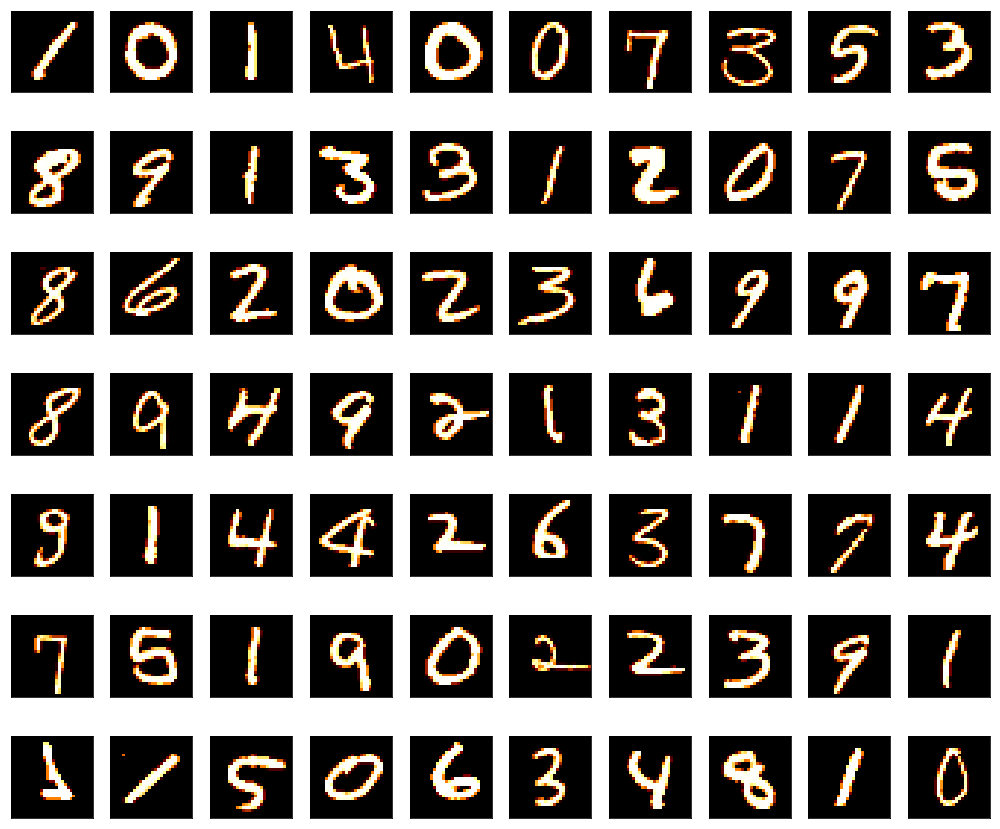

In [5]:
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    plt.imshow(np.array(digits.iloc[digit_num][1:]).reshape(28,28), interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [6]:
data = np.array(digits.drop(['label'],axis=1))
label = np.array(digits['label'])

In [7]:
tsne_representation = np.array(pd.read_csv('tsne_rep.csv'))[:,1:]

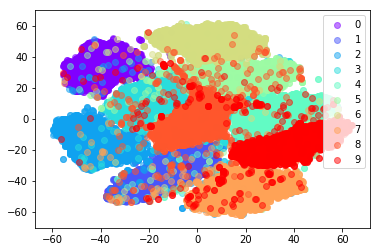

In [8]:
colors = cm.rainbow(np.linspace(0, 1, len(set(label))))
for y, c in zip([0,1,2,3,4,5,6,7,8,9], colors):
    plt.scatter(tsne_representation[label ==y, 0], 
                tsne_representation[label ==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
score = []
for neuron in range(50, 1000, 50):
    net = MLPClassifier(hidden_layer_sizes=(neuron,))
    score.append(cross_val_score(net,data,label,cv=3).mean())

Text(0,0.5,'neuron')

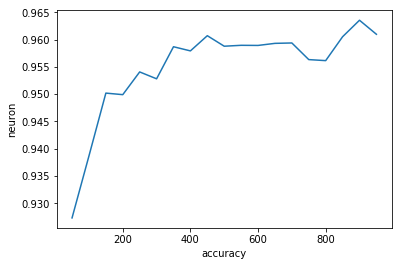

In [24]:
plt.plot(range(50, 1000, 50), score)
plt.xlabel('accuracy')
plt.ylabel('neuron')

In [25]:
net = MLPClassifier(hidden_layer_sizes=(784,))

In [26]:
net.fit(data, label)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(784,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [27]:
y_pred = net.predict(data)

In [28]:
accuracy_score(label, y_pred)

0.9885

# результаты

In [29]:
test = pd.read_csv('test.csv')

In [30]:
test = np.array(test)

In [31]:
test.shape

(28000, 784)

In [32]:
test_predict = net.predict(test)

In [33]:
rezult = pd.DataFrame({'ImageId': range(1,28001), 'Label': test_predict})

In [34]:
rezult.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [35]:
rezult.to_csv('submission.csv', sep=',', index=False)